# Data exploration

In [92]:
# import external modules
import sys, os

ROOT_PATH = os.path.abspath(".").split("src")[0]
module_path = os.path.abspath(os.path.join(ROOT_PATH + "src/utils/"))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc 
from datetime import datetime

import functions as f

from cognite.client import CogniteClient

In [93]:
# set plot settings
sns.set()
sns.set_context('paper')
sns.set_style('whitegrid', {'axes.grid': True, 'grid.linestyle': '--'})
sns.set_palette(sns.color_palette("GnBu_d", 5))

rc('figure', figsize=(12,6), dpi=200)
rc('xtick', labelsize=12)
rc('ytick', labelsize=12)
rc('axes', labelsize=13, titlesize=14)
rc('legend', fontsize=14, handlelength=2)
rc('font', family='serif')
rc('text', color="#000000")
rc('xtick', color="#000000")
rc('ytick', color="#000000")

SEED=100
np.random.seed(SEED)

In [94]:
# read data and metadata
df_train, df_valid, df_test = f.load_data()
stats, ts, ts_train, ts_valid, ts_test = f.load_metadata()

# split datasets into features and targets
x_train, y_train = f.split_dataset(df_train.values, delay=1)
x_valid, y_valid = f.split_dataset(df_valid.values, delay=1)
x_test, y_test = f.split_dataset(df_test.values, delay=1)

# metadata
target_tags = df_train.columns.values[:3]
feature_tags = df_train.columns.values[3:]
target_stds = stats.loc[target_tags,"Std"].values
target_means = stats.loc[target_tags,"Mean"].values

In [108]:
shortened_names = ["FT-92537",
"TT-92539",
"PT-92539",
"ZT_92543",
"PT-92523",
"PDT-92534",
"TT_92532",
"TIC-92504",
"KA_9101"
]

df_train.columns=shortened_names
df_valid.columns=shortened_names
df_test.columns=shortened_names

In [118]:
train_unsc = df_train*stats["Std"].values + stats["Mean"].values
valid_unsc = df_valid*stats["Std"].values + stats["Mean"].values
test_unsc = df_test*stats["Std"].values + stats["Mean"].values

### Statistics

In [109]:
def latexify(df):
    """
    Returns the latex table (string) of a pandas dataframe
    """
    
    multirow = type(df.index) == pd.core.indexes.multi.MultiIndex
    multicolumn = type(df.columns) == pd.core.indexes.multi.MultiIndex
    
    col_format = "ll" if multirow else "l"
    col_format += "c"*len(df.columns.levels[1])*2 if multicolumn else "c"*len(df.columns)
    
    tex = df.to_latex(column_format=col_format,
                      multicolumn=multicolumn, 
                      multicolumn_format='c',
                      multirow=multirow,
                      bold_rows=True)
    
    return tex

def get_summary(df, print_tex=False):
    df_sorted = df.sort_values(by=("Test", "Avg")).apply(pd.to_numeric)
    if print_tex: print(latexify(df_sorted))
    return df_sorted

#### Statistical properties of the TRAINING set

Mean     Median      Std        Max        Min    1st Qu.  \
FT-92537   161806.49  161672.60  3376.68  215234.77  147442.17  159551.21   
TT-92539      124.49     124.51     0.98     128.79     119.51     123.92   
PT-92539       12.70      12.70     0.25      14.29      11.75      12.52   
ZT_92543       38.43      38.71     3.53      60.95      20.37      36.18   
PT-92523        2.90       2.89     0.08       3.84       2.65       2.84   
PDT-92534     103.65     103.46     4.06     149.12      85.98     100.90   
TT_92532       32.76      32.76     1.00      37.29      27.94      32.12   
TIC-92504      39.67      39.78     1.05      44.33      35.49      39.14   
KA_9101      9038.09    9038.90   161.99   11128.30    8230.08    8930.57   

             3rd Qu.  
FT-92537   163912.50  
TT-92539      125.13  
PT-92539       12.88  
ZT_92543       40.56  
PT-92523        2.94  
PDT-92534     106.18  
TT_92532       33.47  
TIC-92504      40.22  
KA_9101      9145.90

In [156]:
a=f.get_stats_properties(train_unsc)
a=a.round(2)
a=a.drop(["NAs"], axis=1)


print(latexify(a))
a

\begin{tabular}{lccccccc}
\toprule
{} &       Mean &     Median &      Std &        Max &        Min &    1st Qu. &    3rd Qu. \\
\midrule
\textbf{FT-92537 } &  161806.49 &  161672.60 &  3376.68 &  215234.77 &  147442.17 &  159551.21 &  163912.50 \\
\textbf{TT-92539 } &     124.49 &     124.51 &     0.98 &     128.79 &     119.51 &     123.92 &     125.13 \\
\textbf{PT-92539 } &      12.70 &      12.70 &     0.25 &      14.29 &      11.75 &      12.52 &      12.88 \\
\textbf{ZT\_92543 } &      38.43 &      38.71 &     3.53 &      60.95 &      20.37 &      36.18 &      40.56 \\
\textbf{PT-92523 } &       2.90 &       2.89 &     0.08 &       3.84 &       2.65 &       2.84 &       2.94 \\
\textbf{PDT-92534} &     103.65 &     103.46 &     4.06 &     149.12 &      85.98 &     100.90 &     106.18 \\
\textbf{TT\_92532 } &      32.76 &      32.76 &     1.00 &      37.29 &      27.94 &      32.12 &      33.47 \\
\textbf{TIC-92504} &      39.67 &      39.78 &     1.05 &      44.33 &      35.49 

Mean     Median      Std        Max        Min    1st Qu.  \
FT-92537   161806.49  161672.60  3376.68  215234.77  147442.17  159551.21   
TT-92539      124.49     124.51     0.98     128.79     119.51     123.92   
PT-92539       12.70      12.70     0.25      14.29      11.75      12.52   
ZT_92543       38.43      38.71     3.53      60.95      20.37      36.18   
PT-92523        2.90       2.89     0.08       3.84       2.65       2.84   
PDT-92534     103.65     103.46     4.06     149.12      85.98     100.90   
TT_92532       32.76      32.76     1.00      37.29      27.94      32.12   
TIC-92504      39.67      39.78     1.05      44.33      35.49      39.14   
KA_9101      9038.09    9038.90   161.99   11128.30    8230.08    8930.57   

             3rd Qu.  
FT-92537   163912.50  
TT-92539      125.13  
PT-92539       12.88  
ZT_92543       40.56  
PT-92523        2.94  
PDT-92534     106.18  
TT_92532       33.47  
TIC-92504      40.22  
KA_9101      9145.90

#### Statistical properties of the VALIDATION set

In [122]:
f.get_stats_properties(valid_unsc)

Mean         Median          Std            Max  \
FT-92537   160973.010606  160744.692157  3675.521044  224396.129479   
TT-92539      125.802685     125.728526     0.874809     129.594619   
PT-92539       12.697634      12.700597     0.253649      14.414898   
ZT_92543       34.055526      33.925720     3.290457      54.675851   
PT-92523        2.904185       2.896975     0.085089       4.021907   
PDT-92534     102.702161     102.378529     4.137944     157.089903   
TT_92532       34.111119      34.037645     0.757422      39.145702   
TIC-92504      39.585963      39.336461     1.566184      45.121540   
KA_9101      9012.340705    9008.679878   166.602481   11349.886165   

                     Min        1st Qu.        3rd Qu.  NAs  
FT-92537   147810.863893  158539.628308  163118.439689  0.0  
TT-92539      120.280666     125.221577     126.353016  0.0  
PT-92539       11.815620      12.512056      12.878516  0.0  
ZT_92543       18.708544      31.856753      36.116832  0.0  
PT-92523        2.605437       2.845006       2.956665  0.0  
PDT-92534      87.757065      99.912284     105.103439  0.0  
TT_92532       29.899634      33.569343      34.605020  0.0  
TIC-92504      35.452167      38.452615      40.649613  0.0  
KA_9101      8297.996216    8902.646272    9118.127080  0.0

#### Statistical properties of the TEST set

In [123]:
f.get_stats_properties(test_unsc)

Mean         Median          Std            Max  \
FT-92537   160691.010294  160551.918067  3266.306515  206544.701678   
TT-92539      126.124215     126.152290     0.857039     130.570725   
PT-92539       12.701097      12.711823     0.230160      14.656747   
ZT_92543       32.584211      32.473496     2.966504      47.748854   
PT-92523        2.901996       2.896788     0.073789       3.943954   
PDT-92534     102.304269     102.051229     3.876100     137.000445   
TT_92532       34.441125      34.442639     0.721820      39.998225   
TIC-92504      39.685648      39.746633     1.806101      45.093667   
KA_9101      9004.869845    9005.403728   160.546805   10645.730129   

                     Min        1st Qu.        3rd Qu.  NAs  
FT-92537   148411.072088  158476.323992  162762.551920  0.0  
TT-92539      122.314638     125.564314     126.738940  0.0  
PT-92539       11.798740      12.534941      12.870114  0.0  
ZT_92543       16.510971      30.587688      34.446907  0.0  
PT-92523        2.642844       2.849850       2.950252  0.0  
PDT-92534      88.686542      99.514819     104.851390  0.0  
TT_92532       31.809115      33.959131      34.952165  0.0  
TIC-92504      35.067940      38.323234      40.993200  0.0  
KA_9101      8328.700825    8896.793262    9112.491605  0.0

### Distributions

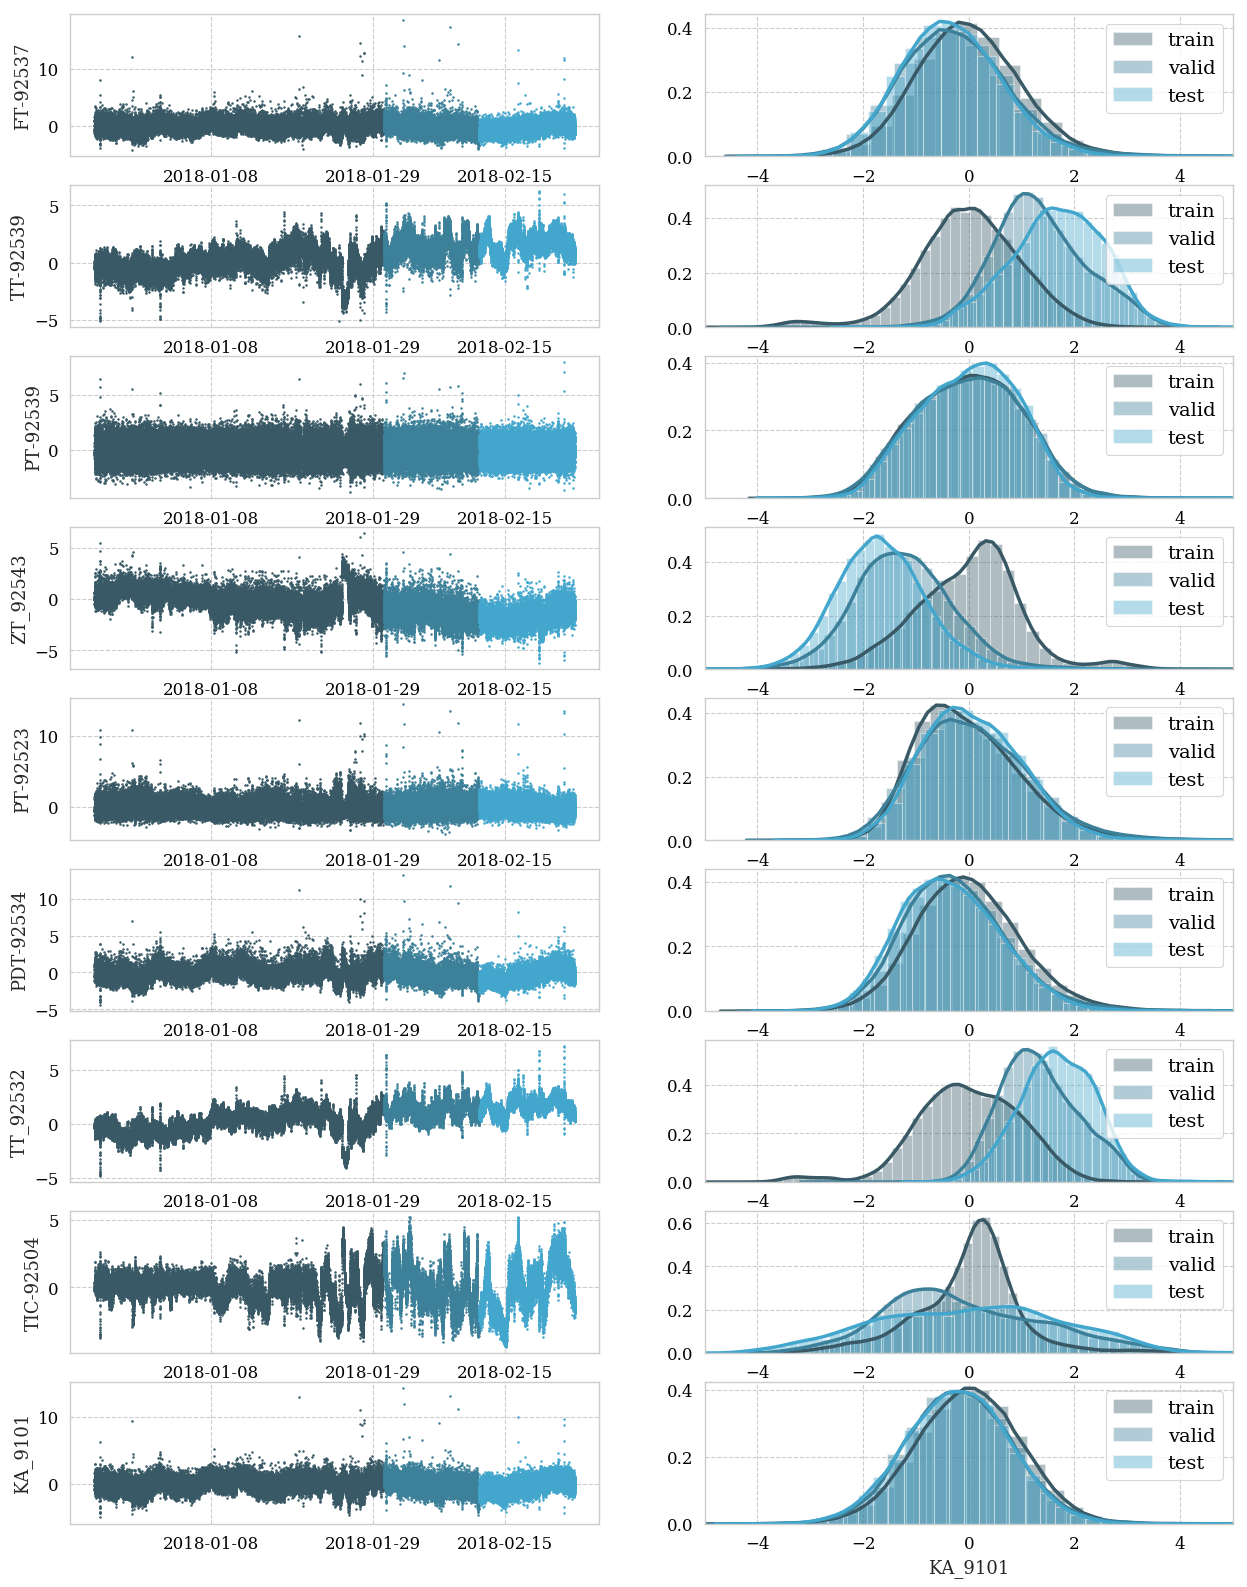

In [184]:
fig, axs = plt.subplots(nrows=df_train.shape[-1], ncols=2, figsize=(15,20), dpi=100)

for k in range(df_train.shape[-1]):
    ax1, ax2 = axs[k, 0], axs[k, 1]
    
    ax1.plot(ts_train, df_train.iloc[:,k], label="train",
             marker="o", ms=.8, lw=0)
    ax1.plot(ts_valid, df_valid.iloc[:,k], label="valid",
             marker="o", ms=.8, lw=0)
    ax1.plot(ts_test, df_test.iloc[:,k], label="test",
             marker="o", ms=.8, lw=0)
    
    ax1.set_xticks(ax1.get_xticks()[3::3])
    ax1.set_ylabel(df_train.columns[k])
    
    #sns.distplot(df_train.iloc[:,k], ax=ax2, fit=stats.norm, label="train", kde=False, fit_kws={"lw":1.5})
    #sns.distplot(df_valid.iloc[:,k], ax=ax2, fit=stats.norm, label="valid", kde=False, fit_kws={"lw":1.5})
    #sns.distplot(df_test.iloc[:,k], ax=ax2, fit=stats.norm, label="test", kde=False, fit_kws={"lw":1.5})
    
    sns.distplot(df_train.iloc[:,k], ax=ax2, label="train", kde=True, kde_kws={"lw":2.5})
    sns.distplot(df_valid.iloc[:,k], ax=ax2, label="valid", kde=True, kde_kws={"lw":2.5})
    sns.distplot(df_test.iloc[:,k], ax=ax2, label="test", kde=True, kde_kws={"lw":2.5})
    
    ax2.set_xlim((-5,5))
    ax2.legend(loc="upper right")

fig.show()

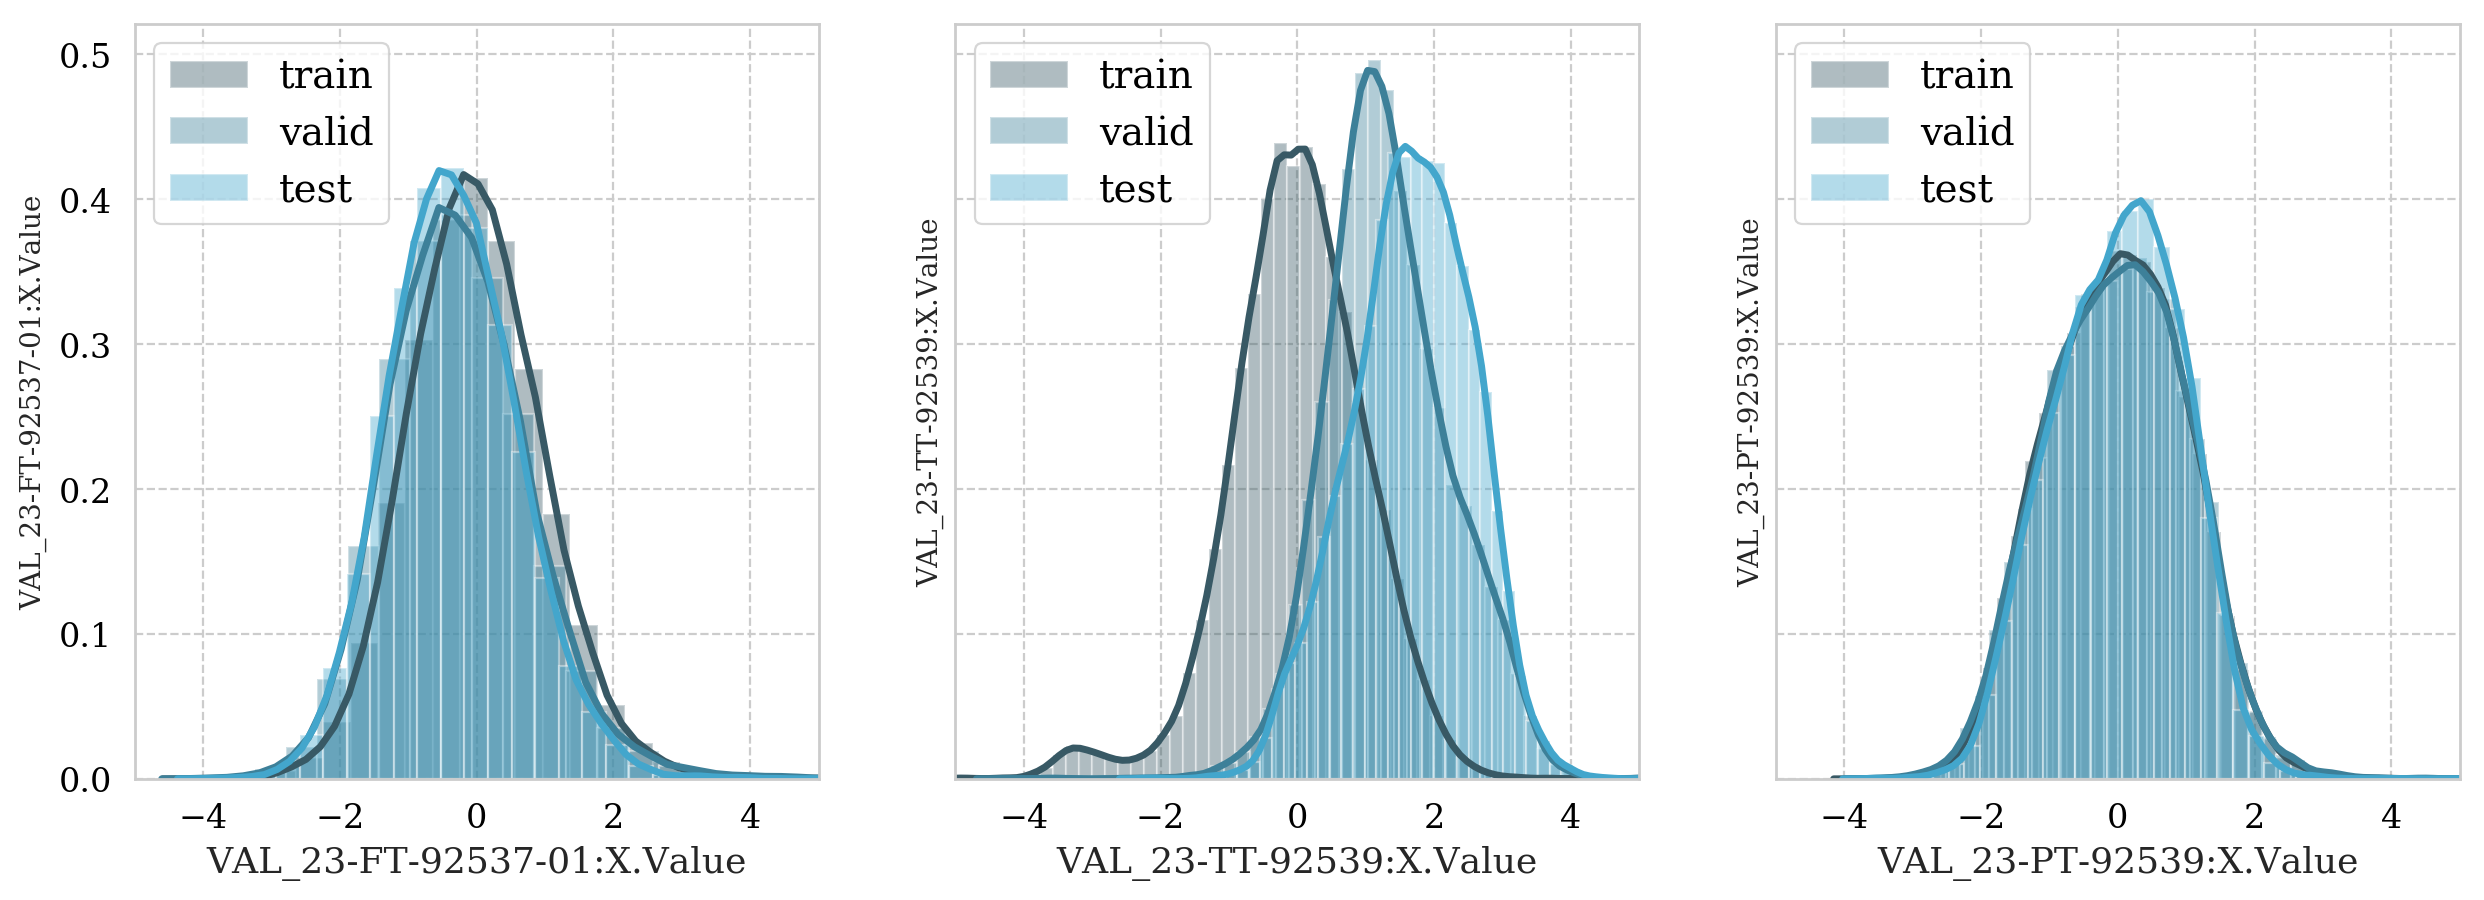

In [82]:
# distribution of targets

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=True, sharey=True)

for k in range(3):
    ax = axs[k]
    
    sns.distplot(df_train.iloc[:,k], ax=ax, kde=True, kde_kws={"lw":2.5}, label="train")
    sns.distplot(df_valid.iloc[:,k], ax=ax, kde=True, kde_kws={"lw":2.5}, label="valid")
    sns.distplot(df_test.iloc[:,k], ax=ax, kde=True, kde_kws={"lw":2.5}, label="test")
    
    ax.set_ylabel(df_train.columns[k], fontsize=10)
    
    ax.set_xlim((-5,5))
    ax.legend(frameon=True, loc='upper left')
    
fig.show()

<Figure size 2400x1200 with 0 Axes>

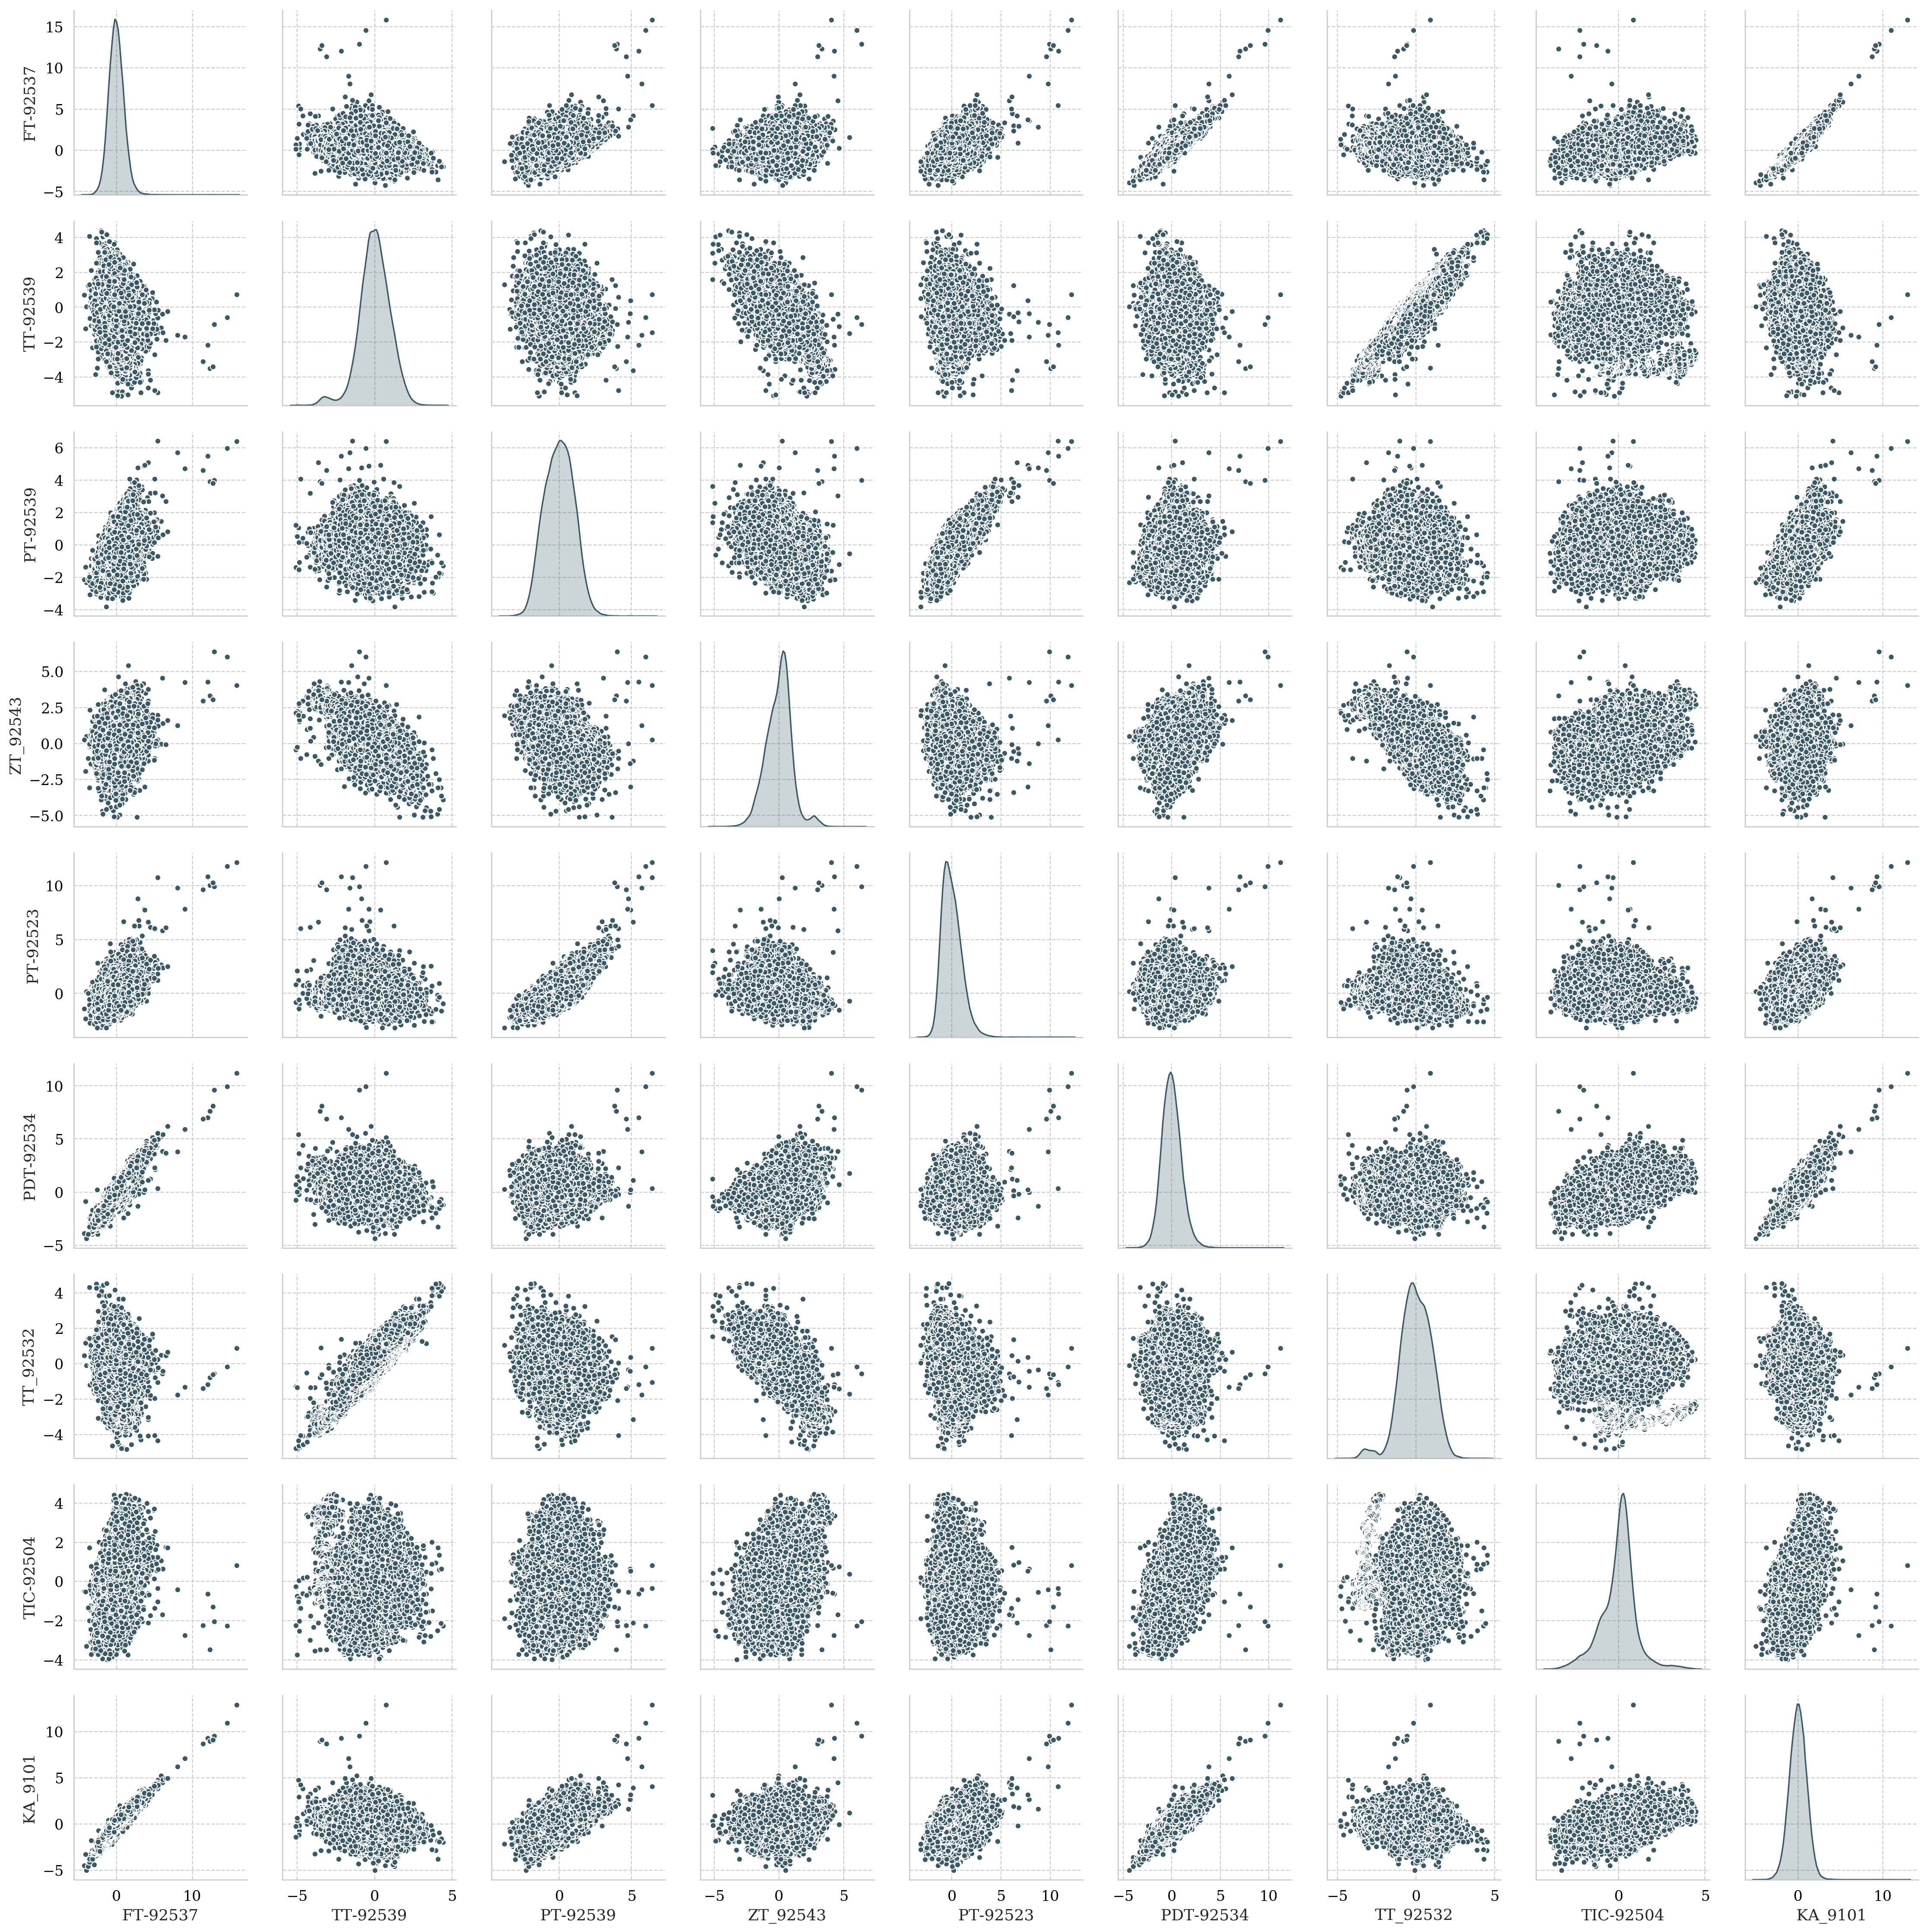

In [65]:
plt.figure()
sns.pairplot(df_train, diag_kind="kde")
plt.show()

### Correlation

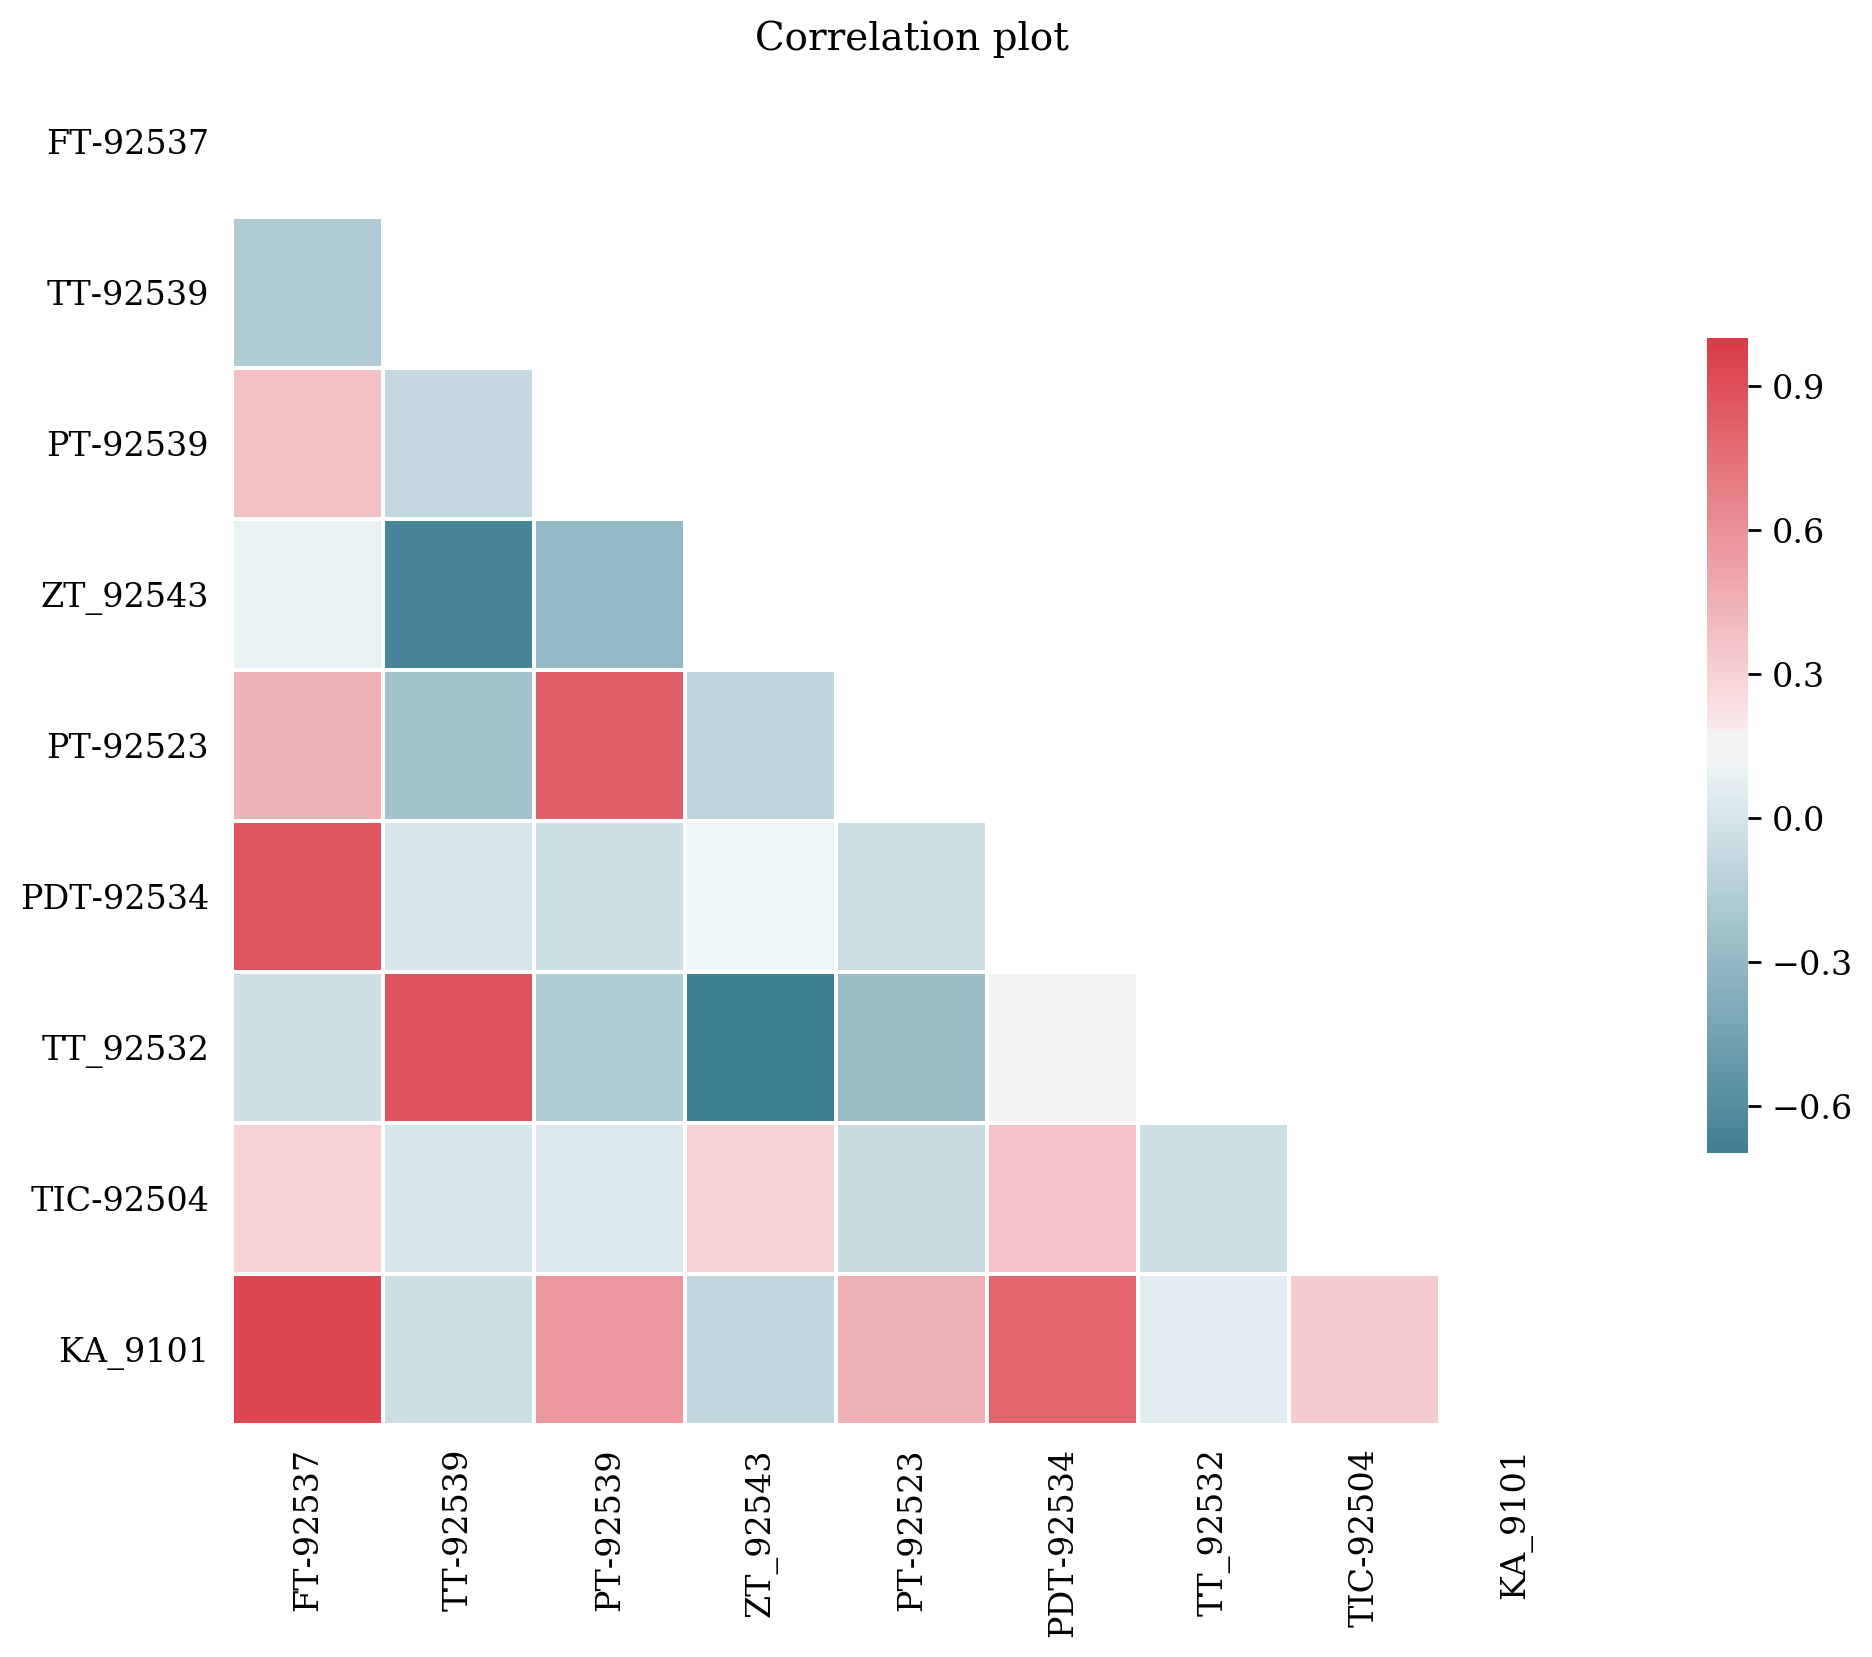

In [124]:
def plot_correlation(df, title="Correlation plot"):
    corr = df.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(15, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap,
                square=True, linewidths=1, cbar_kws={"shrink": .6})

    ax.set_title(title)
    
    f.show()

plot_correlation(df_train)

#### Autocorrelation

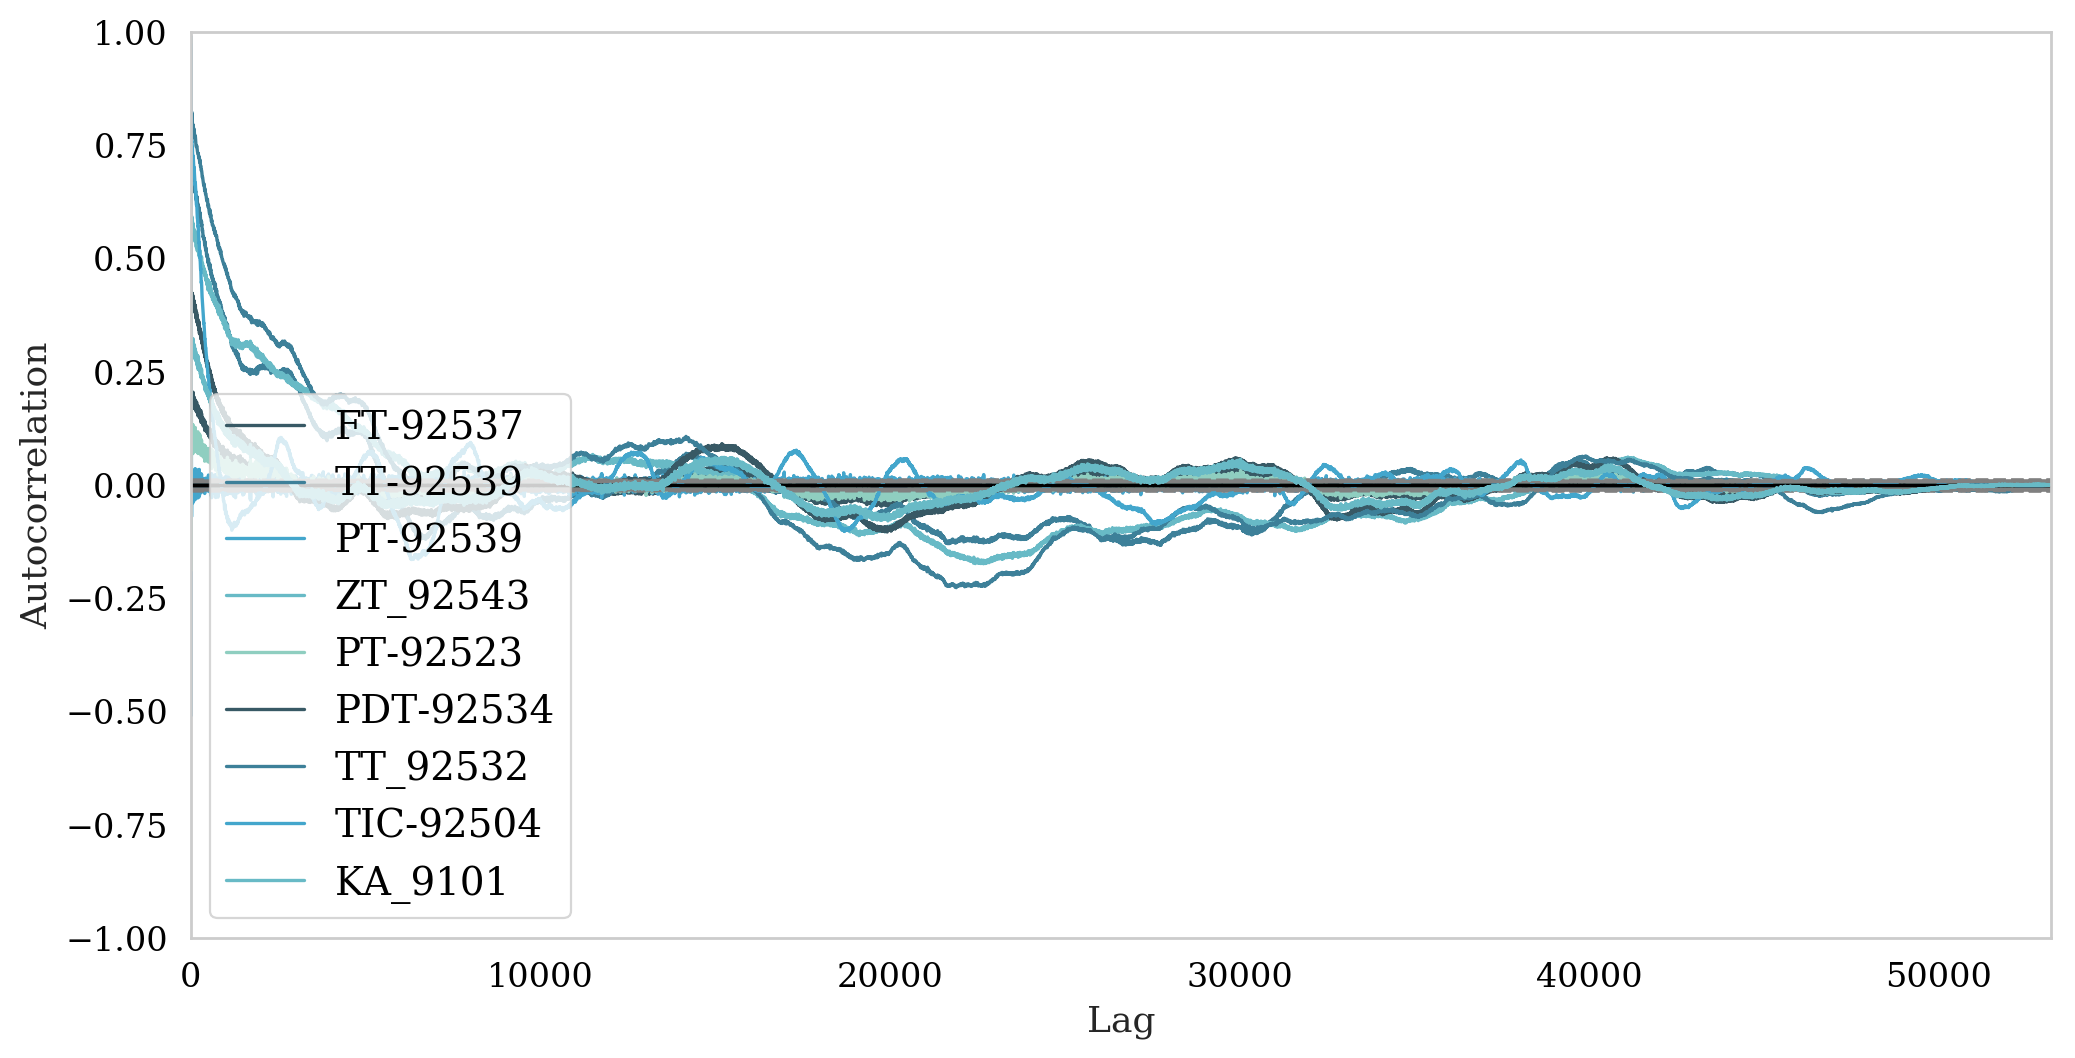

In [158]:
for t in range(len(df_train.columns)):
    pd.plotting.autocorrelation_plot(df_train.iloc[:,t], label=df_train.columns[t])